<a href="https://colab.research.google.com/github/victoraccete/us-accidents/blob/main/Time%20Series%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install kaggle

In [ ]:
#@title Upload yout API token. 
#@markdown Check [here](https://github.com/Kaggle/kaggle-api#:~:text=API%20credentials,file%20containing%20your%20API%20credentials.) to see how to get it.
# importing kaggle.json to use the api 
from google.colab import files
files.upload()
; # suppressing output to hide API informations

Saving kaggle.json to kaggle.json


'# suppressing output to hide API informations'

In [ ]:
#@title Download dataset from Kaggle.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
;
!kaggle datasets download -d sobhanmoosavi/us-accidents

 98% 285M/290M [00:04<00:00, 87.0MB/s]
100% 290M/290M [00:04<00:00, 67.0MB/s]


In [ ]:
#@title Unzipping
# zip extraction cell
import zipfile
zip_ref = zipfile.ZipFile('us-accidents.zip', 'r')
zip_ref.extractall('../content')
zip_ref.close()

## Done

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
accidents = pd.read_csv('US_Accidents_Dec20_Updated.csv')
accidents.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
accidents['Start_Time'] = pd.to_datetime(accidents['Start_Time'])
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               object        
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Number                 float64       
 11  Street                 object        
 12  Side                   object        
 13  City                   object        
 14  County                 object        
 15  State                  object        
 16  Zipcode                object        
 17  Country                object        
 18  Timezone              

In [ ]:
accidents.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)                   0
Description                    0
Number                   1891672
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)             67224
Wind_Chill(F)            1183859
Humidity(%)                71270
Pressure(in)               56908
Visibility(mi)             72078
Wind_Direction             63474
Wind_Speed(mph)           307163
Precipitation(in)        1301326
Weather_Condition          71851
Amenity   

# Análises
### (Sazonalidade, tendência, etc.)

In [ ]:
accidents_by_day = accidents.groupby(by=accidents['Start_Time'].dt.date).count().iloc[:, :1].rename(columns={'ID': 'count'})
accidents_by_day = accidents_by_day.reset_index()
accidents_by_day['Start_Time'] = pd.to_datetime(accidents_by_day['Start_Time'])
accidents_by_day = accidents_by_day.rename(columns={"Start_Time": "date"}).set_index('date')
accidents_by_day

,count
date,
2016-02-08,41
2016-02-09,41
2016-02-10,40
2016-02-11,77
2016-02-12,14
...,...
2020-12-27,5029
2020-12-28,8415
2020-12-29,7977


In [ ]:
accidents_by_day.describe()

,count
count,1785.000000
mean,1628.352941
std,1276.757417
min,1.000000
25%,635.000000
50%,1610.000000
75%,1989.000000
max,9338.000000


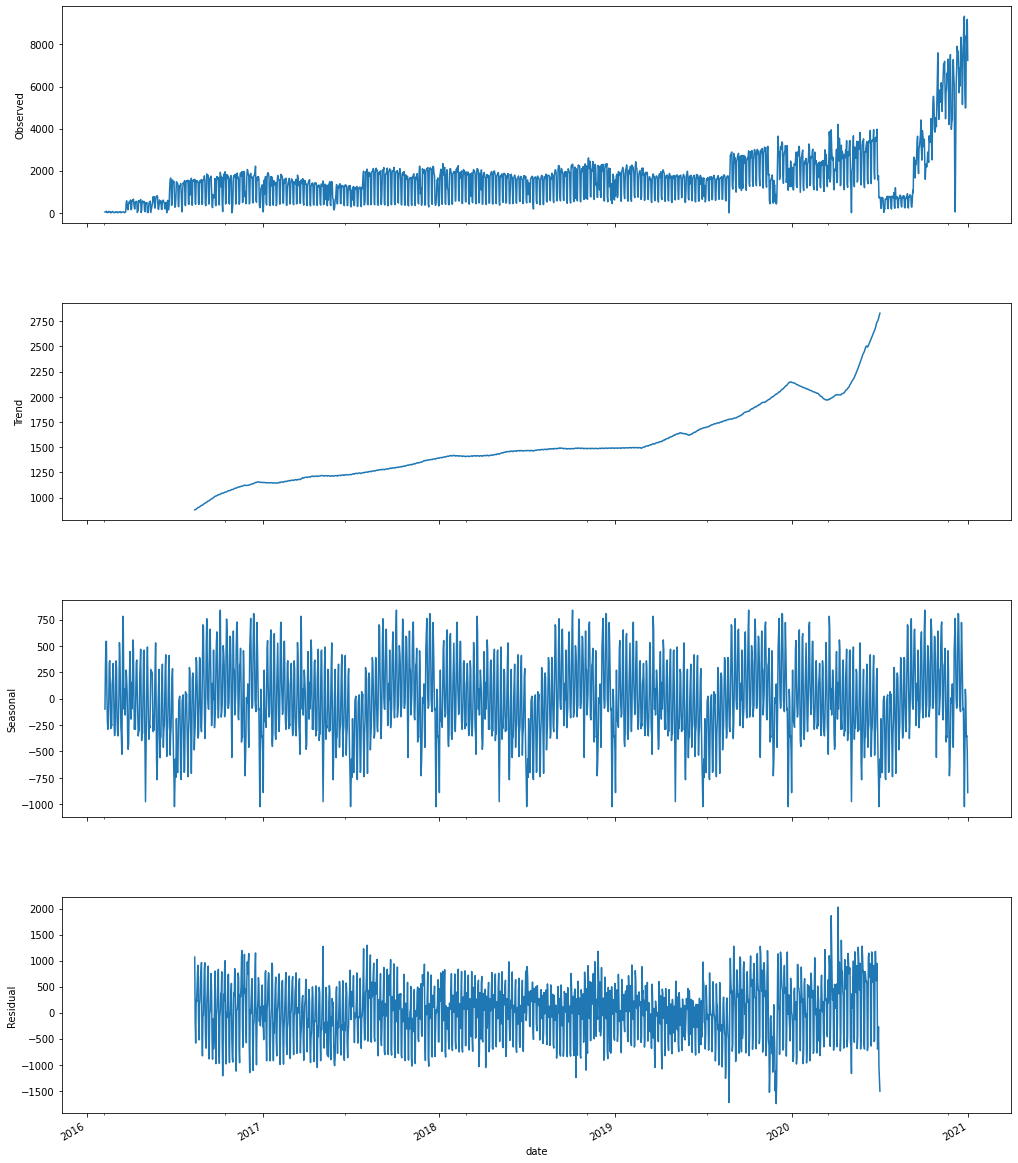

In [ ]:
result = seasonal_decompose(accidents_by_day, model='additive', freq=365)
fig = result.plot()

fig.set_figwidth(16)
fig.set_figheight(20)

In [ ]:
accidents_by_hour = accidents.groupby(by=accidents['Start_Time'].dt.hour).count().iloc[:, :1].rename(columns={'ID': 'count'})
accidents_by_hour = accidents_by_hour.sort_index()
accidents_by_hour

,count
Start_Time,
0,53242
1,49708
2,45443
3,38465
4,60247
5,82780
6,145923
7,215116
8,220131


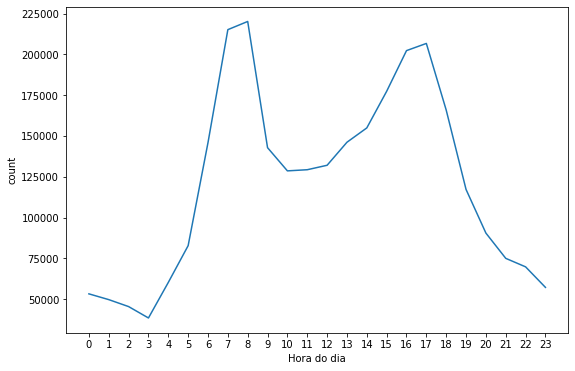

In [ ]:
plt.figure(figsize=(9, 6))
sns.lineplot(data=accidents_by_hour, x='Start_Time', y='count')
plt.xticks([hour for hour in range(24)])
plt.xlabel("Hora do dia")
plt.show()

In [ ]:
accidents_by_weekday = accidents.groupby(by=accidents['Start_Time'].dt.weekday).count().iloc[:, :1].rename(columns={'ID': 'count'})
accidents_by_weekday = accidents_by_weekday.sort_index().reset_index().rename(columns={'Start_Time': 'weekday'})
weekday_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday', 
    5: 'Saturday', 
    6: 'Sunday',
}

accidents_by_weekday['weekday'] = accidents_by_weekday['weekday'].map(weekday_map)
accidents_by_weekday

,weekday,count
0,Monday,475111
1,Tuesday,504308
2,Wednesday,507292
3,Thursday,505811
4,Friday,506750
5,Saturday,215791
6,Sunday,191547


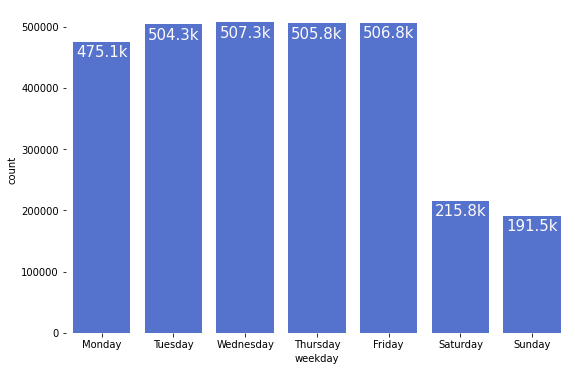

In [ ]:
plt.figure(figsize=(9, 6))
sns.barplot(data=accidents_by_weekday, x='weekday', y='count', color='royalblue')

xlocs, _ = plt.xticks()
for i, value in enumerate(accidents_by_weekday['count']):
    plt.text(xlocs[i], value-5000, f'{value/1000:.1f}k', horizontalalignment='center', 
             verticalalignment='top', fontsize=15, color='snow', fontweight='regular')

plt.box(False)
plt.show()

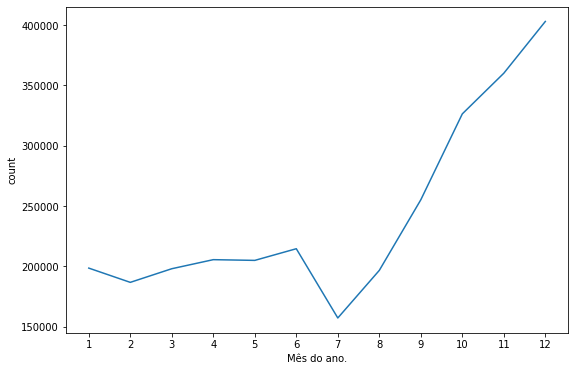

In [ ]:
accidents_by_month = accidents.groupby(by=accidents['Start_Time'].dt.month).count().iloc[:, :1].rename(columns={'ID': 'count'})
accidents_by_month = accidents_by_month.sort_index()

plt.figure(figsize=(9, 6))
sns.lineplot(data=accidents_by_month, x='Start_Time', y='count')
plt.xticks([hour for hour in range(1,13)])
plt.xlabel("Mês do ano.")
plt.show()